# Numerical Integration

Lars Schuster March 4th 2023

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Monte Carlo Method
In Monte Carlo integration you try to integrate a function by random sampeling. 
In one dimension you sample points from a known area that bounds the area under the curve of the function. 
For each point you determine if it is in the area under the curve. 
At the end the area under the curve can be approximated as follows.

$A = \frac{n_{hits}}{n}$

In the following this is done for the unit circle in the first quadrant. 
The function monte_carlo_pi estimates pi by multiplying the found area by 4.

In [92]:

def monte_carlo_pi(n):
    hits = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 < 1:
            hits += 1
    return 4 * hits / n

print(monte_carlo_pi(10**6))

3.139732


The estimate for a million tries is already quite good.

In [93]:
n_vals = np.array([10**i for i in range(1, 9)])
pis = np.array([monte_carlo_pi(i) for i in n_vals])
pi_error = np.abs(pis - np.pi)

pi_error_log = np.log10(pi_error)
n_vals_log = np.log10(n_vals)
# liner regression

m, b = np.polyfit(n_vals_log, pi_error_log, 1)
for i in range(8):
    print("n = {:<10} pi = {:<10} error = {:<10}".format(n_vals[i], pis[i], pi_error[i]))

n = 10         pi = 3.6        error = 0.458407346410207
n = 100        pi = 3.16       error = 0.018407346410207026
n = 1000       pi = 3.072      error = 0.06959265358979305
n = 10000      pi = 3.1532     error = 0.011607346410206887
n = 100000     pi = 3.14228    error = 0.0006873464102068461
n = 1000000    pi = 3.14156    error = 3.2653589792985827e-05
n = 10000000   pi = 3.1422292  error = 0.0006365464102069396
n = 100000000  pi = 3.1415348  error = 5.7853589793044335e-05


To see the convergence of the Monte Carlo Method we plot the error as a graph of the number of points in a log-log-graph.

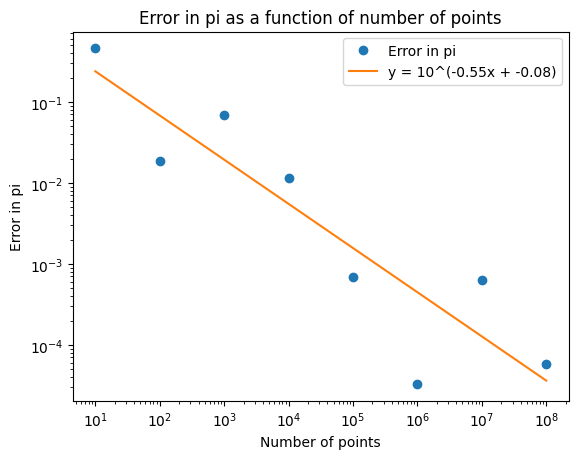

In [94]:
plt.plot(n_vals, pi_error, "o", label="Error in pi")
plt.plot(n_vals, 10**(m*n_vals_log + b), label="y = 10^({:.2f}x + {:.2f})".format(m, b))
plt.title("Error in pi as a function of number of points")
plt.xlabel("Number of points")
plt.ylabel("Error in pi")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

The slope of the graph is given by $m \approx -0.5$. 

$Error  \propto \frac{1}{\sqrt{n}}$

# Quadrature integration

Another method to integrate is similar to the riemann sum. 
In this method the inverval of integration is divided into n intervals of length h.
For each of the subintervals the area under the graph is approximated by a rectangle.
We will use the mid-point approximation where the height of the rectangle is given by the value of the function to integrate at that point.
Since the unit circle is semetric with respect to the y axis we can just double the value of the fuction that describes its upperbound and integrate from -1 to 1.

In [95]:
def quadrature_mid_point(h,func,bound,x_a,x_b,y_a,y_b):
    #fucnction assumes that f is positive on [a,b]
    Area = 0 
    nx,ny = int((x_b-x_a)/h),int((y_b-y_a)/h)
    for i in range(nx):
        for j in range(ny):
            x_i = x_a + (i+0.5)*h
            y_i = y_a + (j+0.5)*h
            if bound(x_i,y_i):
                Area += h**2 * func(x_i,y_i)
    return Area

def bound_unit_circle(x , y):
    return (x**2 + y**2 <= 1 )

def func(x,y):
    return 1

Lets integrate the function x = 1 over the unit circle to get the circles area.

In [96]:
h_vals = np.array([0.1*0.5**i for i in range(8)])
circle_vals = np.array([quadrature_mid_point(i,func,bound_unit_circle,-1,1,-1,1) for i in h_vals])

for i in range(0, len(circle_vals)):
    print("h = {:4f}| Area = {:4f}".format(h_vals[i],circle_vals[i], ))

h = 0.100000| Area = 3.160000
h = 0.050000| Area = 3.160000
h = 0.025000| Area = 3.140000
h = 0.012500| Area = 3.141875
h = 0.006250| Area = 3.142656
h = 0.003125| Area = 3.141563
h = 0.001563| Area = 3.141631
h = 0.000781| Area = 3.141638


The best results from this method are achieved if you integrate over a square:

In [97]:
def square(x,y):
    if  x>= -1 and x<= 1 and y>= -1 and y<= 1:
        return True
    else:
        return False

h_vals = np.array([0.1*0.5**i for i in range(8)])
square_vals = np.array([quadrature_mid_point(i,func,square,-1,1,-1,1) for i in h_vals])

for i in range(0, len(square_vals)):
    print("h = {:4f}| Area = {:4f}|".format(h_vals[i],square_vals[i], 4 -square_vals[i] ))

h = 0.100000| Area = 4.000000|
h = 0.050000| Area = 4.000000|
h = 0.025000| Area = 4.000000|
h = 0.012500| Area = 4.000000|
h = 0.006250| Area = 4.000000|
h = 0.003125| Area = 4.000000|
h = 0.001563| Area = 4.000000|
h = 0.000781| Area = 4.000000|


We can estimate pi by using the formular:

$\pi \approx 4 \cdot \frac{A_{disk}}{A_{square}}$

In [98]:
for i in range(0, len(circle_vals)):
    print("h = {:4f}| Pi = {:4f}| error = {:4f}".format(h_vals[i],4 * circle_vals[i]/ square_vals[i], np.pi - 4 * circle_vals[i]/ square_vals[i] ))

h = 0.100000| Pi = 3.160000| error = -0.018407
h = 0.050000| Pi = 3.160000| error = -0.018407
h = 0.025000| Pi = 3.140000| error = 0.001593
h = 0.012500| Pi = 3.141875| error = -0.000282
h = 0.006250| Pi = 3.142656| error = -0.001064
h = 0.003125| Pi = 3.141562| error = 0.000030
h = 0.001563| Pi = 3.141631| error = -0.000038
h = 0.000781| Pi = 3.141638| error = -0.000046


Lets visualize the integration for the unit disk:

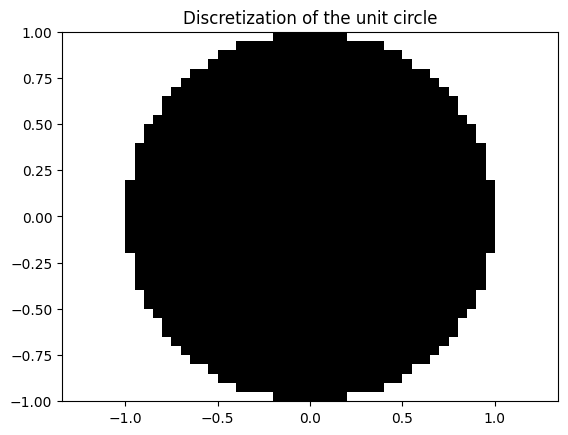

In [99]:
def vis(h):
    x = np.linspace(-1 + h/2, 1 - h/2, int(2/h))
    y = np.linspace(-1 + h/2, 1 - h/2, int(2/h))
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if bound_unit_circle(X[i, j], Y[i, j]):
                Z[i, j] = 1
    plt.pcolormesh(X, Y, Z, cmap="Greys")
    plt.title("Discretization of the unit circle")
    plt.axis("equal")
    plt.show()
vis(0.05)


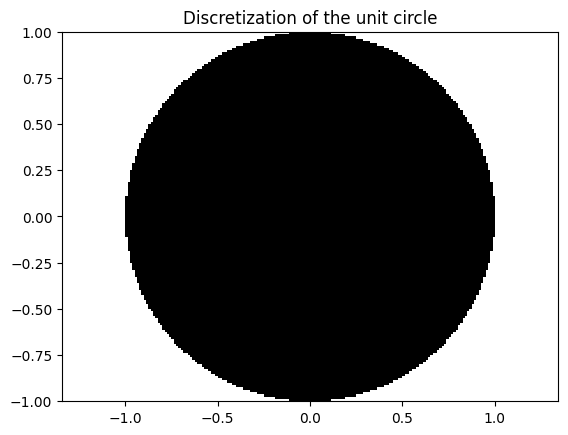

In [100]:
vis(0.0125)

To compare this method with the Monte Carlo integration method we can plot the errors of the method.

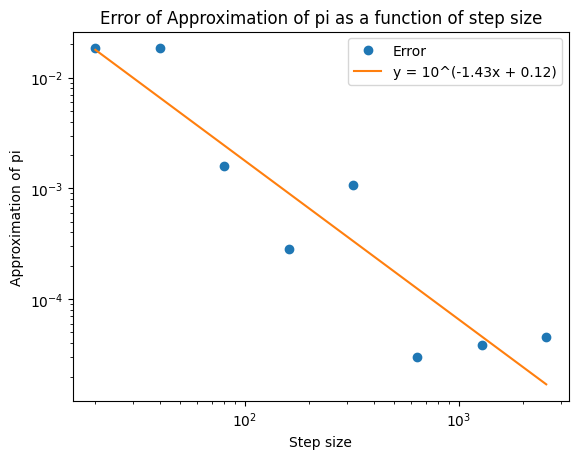

In [101]:
pi_error= np.abs(circle_vals - np.pi)
n_vals= 2/h_vals

pi_error_log = np.log10(pi_error)
n_vals_log = np.log10(n_vals)
m, b = np.polyfit(n_vals_log, pi_error_log, 1)

plt.plot(n_vals,pi_error, "o", label="Error")
plt.plot(n_vals, 10**(m*n_vals_log + b), label="y = 10^({:.2f}x + {:.2f})".format(m, b))
plt.title("Error of Approximation of pi as a function of step size")
plt.xlabel("Step size")
plt.ylabel("Approximation of pi")
plt.xscale("log")
plt.yscale("log")
plt.legend()

The error of this mehtod decreases much faster. 

$Error  \propto \frac{1}{n^{1.4}}$

The classis methods are usually faster for the low dimensions we are dealing with.
Once we reach higher dimensions Monte Carlo Methods become more and more powerful and the convergence will be much faster than classical algorithms.